1Q) Read and extract data from the file studentdata.csv. Download studentdata.csv.Calculate the BMI using formula BMI=weight/(height)Create a plot of age versus BMI with appropriate labels and title. 

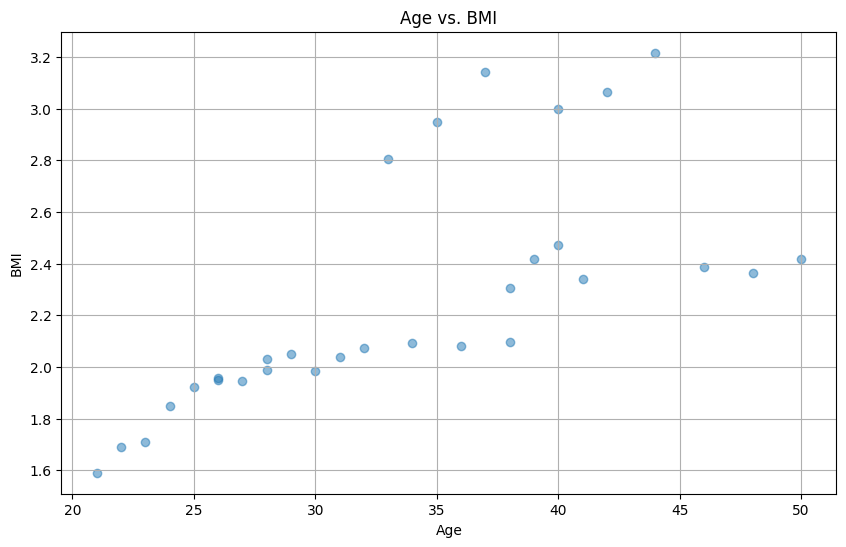

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("/Users/tbs/Downloads/studentdata.csv")

# Calculate BMI
data['BMI'] = data['weight'] / data['height'] ** 2  # Convert height from cm to meters

# Create a plot of age versus BMI
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['BMI'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs. BMI')
plt.grid(True)

# Display the plot
plt.show()


2Q) Read and extract height, weight from file studentdata.csv Download studentdata.csv. By using least squares polynomial fit, create models that range from polynomial degrees of 1 to 5. i.e. create 5 models. Without plotting the models, identify which one has the best model and print the statistic used to identify the best fit model.

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Read the data from studentdata.csv
data = pd.read_csv('/Users/tbs/Downloads/studentdata.csv')

# Extract height and weight data
height = data['height'].values
weight = data['weight'].values

# Initialize variables to store the best model and its associated R-squared value
best_model = None
best_r2 = -1  # Initialize with a low value

# Loop through polynomial degrees from 1 to 5 and fit models
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    height_poly = poly.fit_transform(height.reshape(-1, 1))

    # Fit a linear regression model with polynomial features
    model = LinearRegression()
    model.fit(height_poly, weight)

    # Make predictions using the model
    weight_pred = model.predict(height_poly)

    # Calculate the R-squared value
    r2 = r2_score(weight, weight_pred)

    # Update the best model if a higher R-squared value is found
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_degree = degree

# Print the best model and its R-squared value
print(f"Best-fit model (Polynomial Degree {best_degree}) with R-squared: {best_r2}")


Best-fit model (Polynomial Degree 5) with R-squared: 0.7518652400152162


3Q) Write a Python program to generate data that uses the sum of a random variable (which has a Gaussian distribution) and a 4th-degree polynomial equation (3x4+x3+3x2+4x+5). Using least squares polynomial fit, curve the generated data using a model until your model can accurately predict all values.

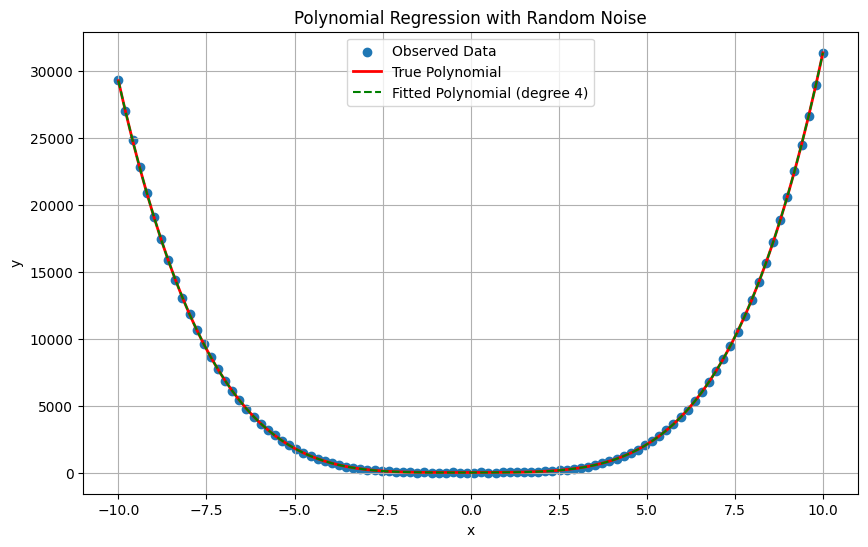

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Set a random seed for reproducibility
np.random.seed(0)

# Define the polynomial equation coefficients
coefficients = [3, 1, 3, 4, 5]

# Generate data points
x = np.linspace(-10, 10, 100)
y_poly = np.polyval(coefficients, x)  # True values from the polynomial equation
noise = np.random.normal(0, 10, x.shape)  # Gaussian noise with mean 0 and standard deviation 10
y_data = y_poly + noise  # Observed data with noise

# Define a range of polynomial degrees to try
degrees = list(range(1, 11))

best_degree = None
best_model = None

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly, y_data)

    # Predict using the model
    y_pred = model.predict(X_poly)

    # Calculate the mean squared error (MSE)
    mse = ((y_data - y_pred) ** 2).mean()

    if mse < 100:  # Adjust this threshold as needed
        best_degree = degree
        best_model = model
        break

# Predict using the best model
X_poly = poly.fit_transform(x.reshape(-1, 1))
y_pred = best_model.predict(X_poly)

# Plot the true polynomial equation, observed data, and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y_data, label="Observed Data")
plt.plot(x, y_poly, color='red', linewidth=2, label="True Polynomial")
plt.plot(x, y_pred, color='green', linestyle='--', label=f'Fitted Polynomial (degree {best_degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Random Noise')
plt.legend()
plt.grid(True)
plt.show()


4Q) Write a Python program to plot the t-distribution of completion times of all the racers in Boston Marathon from 2012 (use bm_results2012.csv Download bm_results2012.csv) and overlay the plot with the t-distribution of a sample of 100 randomly selected racers. Both the t-distribution should be in the same chart, overlapping each other, but with different colors

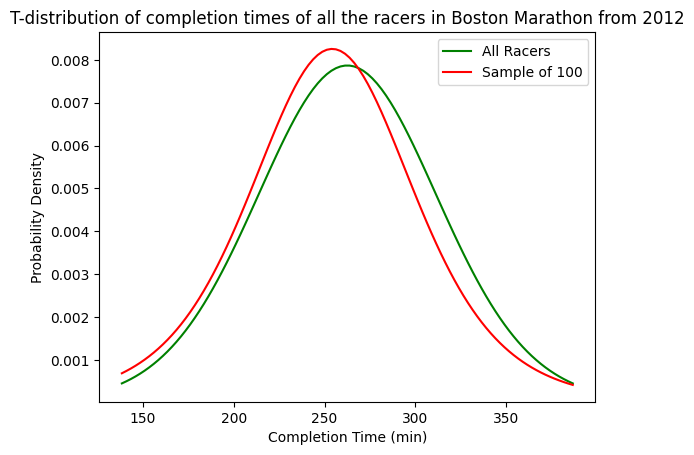

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Read the Boston Marathon results data
df = pd.read_csv("/Users/tbs/Downloads/bm_results2012.csv", encoding = "ISO-8859-1")

# Remove any dashes (-) from the official times
df = df[df['official'] != '-']

# Convert the official times to floats
all_times = df['official'].astype(float)

# Select a random sample of 100 racers
sample = np.random.choice(all_times, 100)

# Fit a t-distribution to the official times of all racers
t_all = t.fit(all_times)

# Fit a t-distribution to the official times of the sample of racers
t_sample = t.fit(sample)

# Generate a range of values for the t-distribution
x = np.linspace(t.ppf(0.01, *t_all), t.ppf(0.99, *t_all), 100)

# Plot the t-distribution for all racers
plt.plot(x, t.pdf(x, *t_all), color='green')

# Plot the t-distribution for the sample of racers
plt.plot(x, t.pdf(x, *t_sample), color='red')

# Label the axes
plt.xlabel('Completion Time (min)')
plt.ylabel('Probability Density')

# Add a title to the plot
plt.title('T-distribution of completion times of all the racers in Boston Marathon from 2012')

# Add a legend
plt.legend(['All Racers', 'Sample of 100'])

# Show the plot
plt.show()
